# Exploring the relationship between regularization and prediction errors

My approach to this task involved:
- Generating a random dataset of 100 X values, and calculating the corresponding Y values on a parabolic curve, with some random noise.
- Splitting the dataset into a training set (of size 80) and a testing set (of size 20)
- For the training set, calculating the `beta_spline` for lambda in (0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100), and plotting the predicted Y values. 
- For the testing set, calculating the predicted Y values using the `beta_spline` calculated in the training phase, for lambda = (0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100).
- Plotting the average error of prediction for the training set and the testing set, against the regularization parameter lambda.

## Generating the random dataset

In [2]:
source("Ridge.R")

set.seed(19)

n_total    = 100
n_training = 80
n_testing  = 20

p = 50
sigma = 0.1

# Generate random dataset
X = runif(n_total)

# Extract training set (80% of total)
X_training = sort(X[1:n_training])
Y_training = X_training ^ 2 + rnorm(n_training) * sigma

# Extract testing set (20% of total)
X_testing = sort(X[n_training + 1 : n_total])
Y_testing = X_testing ^ 2 + rnorm(n_testing) * sigma

# Configuration
lambdas = c(0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100)
colors = c("brown", "red", "orange", "yellow", "green", "blue", "purple", "black")

## Training Phase

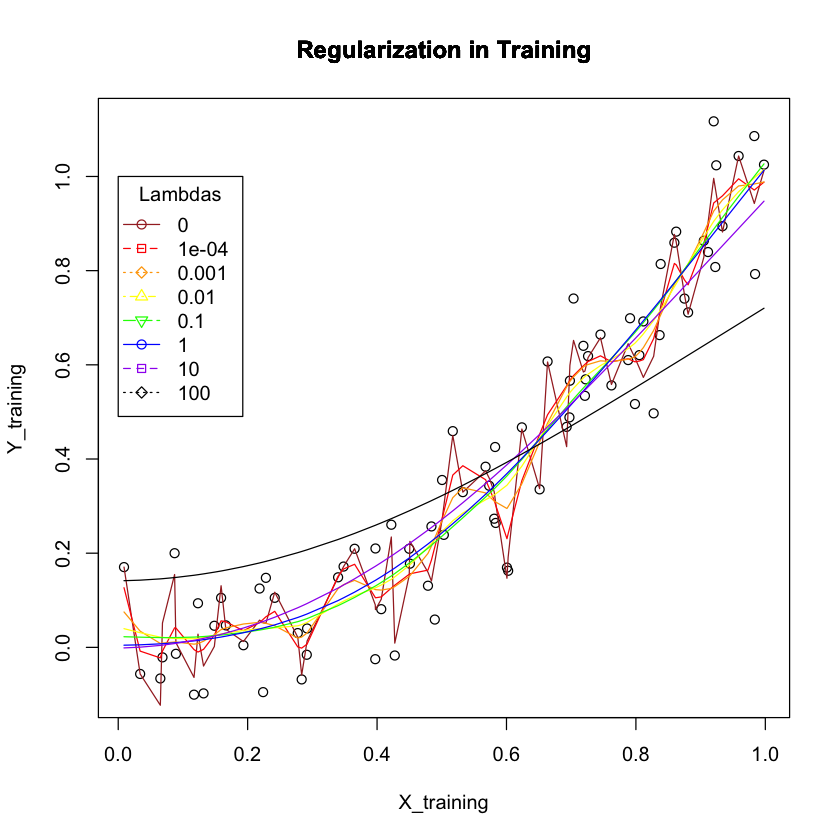

In [3]:
training_errors = c(rep(0, 8))
plot(X_training, Y_training)

for(i in 1:8){
    title(main="Regularization in Training")
    output = mySpline(X_training, Y_training, lambdas[i], p)
    
    training_errors[i] = sum(abs(Y_training - output$"predicted_y")) / length(Y_training)
    lines(X_training, output$"predicted_y", col=colors[i], pch=20 + i, lty=1)
}
legend(0, 1, lambdas, col=colors, pch=21:25, lty=1:5, title="Lambdas")

The plot above indicates that the regularization parameter `lambda` applies a smoothening effect on the predicted values, and accomodates the noise in the dataset. 

When `lambda` is set to 0, overfitting occurs. For small values of `lambda`, a smooth parabolic curve is obtained. However, for very large values of `lambda`, the fitting is very poor.

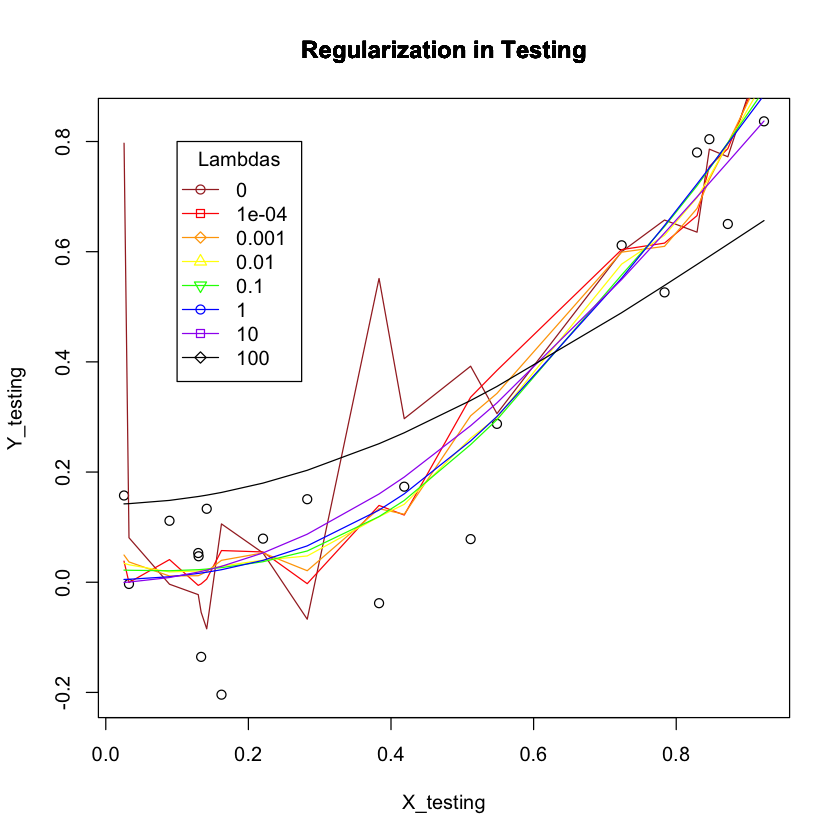

In [4]:
# Generate testing set (20% of total)
X_testing = sort(runif(n_testing))
Y_testing = X_testing ^ 2 + rnorm(n_testing) * sigma

testing_errors = c(rep(0, 8))
plot(X_testing, Y_testing)

for(i in 1:8){
    title(main="Regularization in Testing")
    output = mySpline(X_training, Y_training, lambdas[i], p)
    
    X = matrix(X_testing, nrow = n_testing)
    for(k in (1:(p-1))/p){
        X = cbind(X, (X_testing > k) * (X_testing - k))
    }
    
    predicted_y = cbind(rep(1, n_testing), X) %*% output$"beta_spline"
    testing_errors[i] = sum(abs(Y_testing - predicted_y)) / length(Y_testing)
    lines(X_testing, predicted_y, col=colors[i], pch=20 + i, lty=1)
}
legend(0.1, 0.8, lambdas, col=colors, pch=21:25, lty=1:1, title="Lambdas")

The plot above shows that when lambda is set to 0, overfitting occurs. The curve for `lambda = 0` does a very poor job of predicting Y values, with some of the predictions going out of the plot.

The curves for small values of `lambda` do a good job of predicting the Y values in the testing set. However, for large values of `lambda`, the curves are too smooth, and don't fit the X values properly.

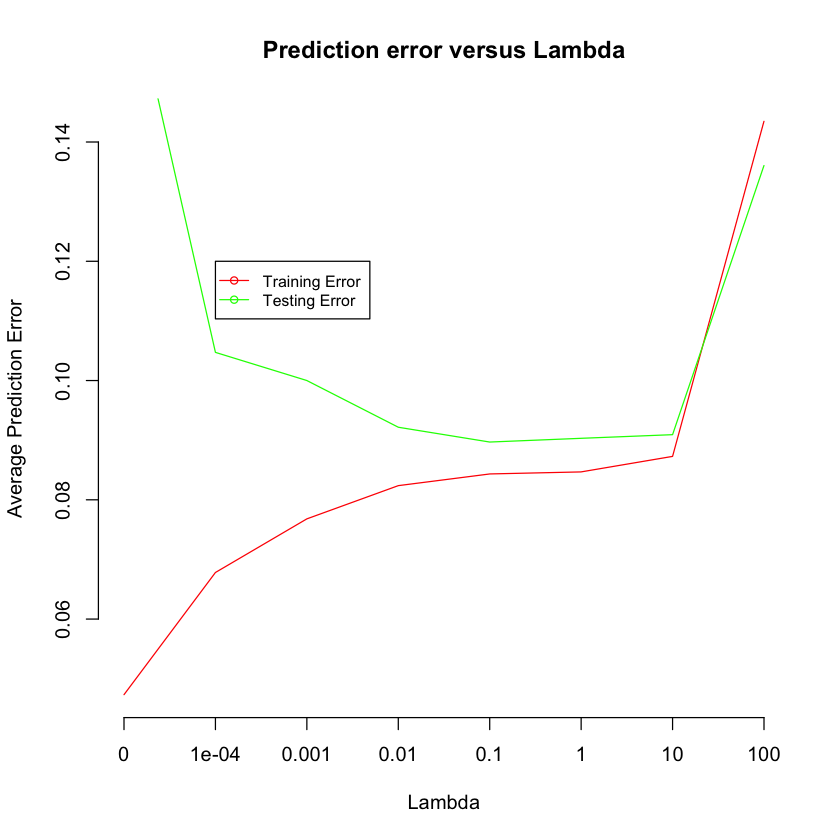

In [5]:
plot(training_errors, typ="l", col="red", axes=F, ann=F)
title(main="Prediction error versus Lambda", xlab="Lambda", ylab="Average Prediction Error")
axis(1, at=1:8, lab=lambdas)
axis(2, las=0.1)

lines(testing_errors, col="green")

legend(2, 0.12, c("Training Error","Testing Error"), cex=0.8, col=c("red","green"), pch=21:21, lty=1:1);

The plot above confirms the relationship between `lambda`, the regularization parameter, and the prediction errors in training and testing. 

When `lambda` is set to 0, overfitting occurs. So while the error of prediction in the training set is very small, the curve that is fitted produces very large prediction errors. Small values of `lambda` on the other hand, produce better fitting curves. A lambda value of **10** is well suited to the given dataset.